# Data Science Mathematics
# Principal Component Analysis
# In-Class Activity

Refer to your in-class handout for instructions.  You are going to do most of the coding yourself here.

Read about this library here:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

First, let's import our relevant libraries.

#1 cov(x, x) = sigma[(xi - x_bar)(xi - x_bar)]/(n-1)
    = sigma[(xi - x_bar)^2)]/(n-1)
    = var(x)
    
#2 Dimensional reduction can improve the efficiency and simplicity of calculation on large data sets. Simplicity can improve model accuracy by ensuring models aren't trained on spurious data or noise. Dimensional reduction can be detrimental if it generalizes/discards useful data, or if the data is not truly Gaussian. Dimensionality reduction can assist with the "Curse of Dimensionality" by reducing the size of the solution space, which reduces the number of datapoints needed to make meaningful predictions, and ultimately increases the models accuracy. 

#3 
a = [[3, 0 ,0],
    [-4, 6, 2],
    [16, -15, -5]]

lambda_i = [[L, 0, 0],
            [0, L, 0],
            [0, 0, L]]

a-lambda_i = [[3-L, 0, 0],
              [-4, 6-L, 2],
              [16, -15, -5-L]]
              
(a-lamda_i) = 0 => (3-L)[[6-L, 2],
                         [15, -5-L]]
                       
=> (3-L)[(6-L)(-5-L)-(2*-15)]
=> (3-L)[-30+5L-6L+L^2+30]
=> (3-L)(L^2-L)
=> (3-L)(L)(L-1)
=> L={0, 1, 3}

for L=0
a - Li = [[3, 0, 0],
          [-4, 6, 2],
          [16, -15, -5]]

3x = 0
-4x + 6y + 2z = 0
16x - 15y -5z = 0

=> x=0 => y = (-2z/6) => (30z/6) - 5z = 0 => 5z = 5z 
let z=1 then E(L=0) = [0, -.333, 1]

for L=1
a - Li = [[2, 0, 0],
          [-4, 5, 2],
          [16, -15, -6]]
          
2x = 0
-4x + 5y + 2z = 0
16x - 15y - 6z = 0
=> x=0 => z = (5y/2) => -15y + 6(5y/2) = 0 => 15y = 15y
let y=1 then E(L=1) = [0, 1, -2.5]

for L=3
a - Li = [[0, 0, 0],
          [-4, 3, 2],
          [16, -15, -8]]

-4x + 3y + 2z = 0
16x + 15y - 8z = 0
let x=1 then 
=> 3y + 2z = 4
   -15y - 8z = -16
=> y = (4 - 2z)/3 => -15[(4 - 2z)/3] - 8z = -16 => -5(4-2z) - 8z = -16
=> -20 + 10z - 8z = -16 => 2z = 4 => z = 2
=> y = (4 2(2))/3 => y=0

#4 det(a) = 3[[6, 2]
              [-15, -5]]
= 3 ((6*-5) - (2*-15)) = 3 * (-30 + 30) = 3 * 0 = 0

det(a) = 0

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize 
import matplotlib

a = np.array([[3, 0 ,0],
    [-4, 6, 2],
    [16, -15, -5]])

eigenvectors = np.array([[1,0,0],
                        [0,1,-.333],
                        [2,-2.5,1]])

print(np.round(np.matmul(a, eigenvectors),2))



[[ 3.   0.   0. ]
 [ 0.   1.   0. ]
 [ 6.  -2.5 -0. ]]


First, we need to instantiate our data set.

In [3]:
data = np.array([[5.1,3.5,1.4,0.2],
[4.9,3.0,1.4,0.2],
[4.7,3.2,1.3,0.2],
[4.6,3.1,1.5,0.2],
[5.0,3.6,1.4,0.2],
[5.4,3.9,1.7,0.4],
[4.6,3.4,1.4,0.3],
[5.0,3.4,1.5,0.2],
[4.4,2.9,1.4,0.2],
[4.9,3.1,1.5,0.1],
[5.4,3.7,1.5,0.2],
[4.8,3.4,1.6,0.2],
[4.8,3.0,1.4,0.1],
[4.3,3.0,1.1,0.1],
[5.8,4.0,1.2,0.2],
[5.7,4.4,1.5,0.4],
[5.4,3.9,1.3,0.4],
[5.1,3.5,1.4,0.3],
[5.7,3.8,1.7,0.3],
[5.1,3.8,1.5,0.3]])

Now, in the cell below, calculate your covariance matrix for the above data set:
> c = np.cov(x)

In [4]:
#data = data/np.linalg.norm(data)
print(data)
c = np.cov(data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]]


Print the covariance matrix.

In [36]:
print(c) #should c be 20x20 or 4x4? why?

(20, 20)


Now, in the cell below, calculate the eigenvectors and eigenvalues of the covariance matrix.

In [6]:
w, v = np.linalg.eig(c)
print ("eigenvalues=", len(w))
print ("eigenvectors=", v)

eigenvalues= 20
eigenvectors= [[-2.27624404e-01+0.j         -4.65387044e-03+0.j
   3.84689594e-02+0.j         -2.19203524e-01+0.j
  -6.40905366e-02+0.0201665j  -6.40905366e-02-0.0201665j
  -1.45857484e-01+0.j         -3.62629304e-02+0.17193483j
  -3.62629304e-02-0.17193483j -1.11989085e-01-0.00978793j
  -1.11989085e-01+0.00978793j  6.10563775e-02+0.j
   2.72739539e-02+0.j          1.50524246e-01+0.j
   4.58572651e-02+0.j          6.83966359e-02+0.j
  -8.48484342e-02+0.j          1.12504320e-01+0.j
  -7.63000004e-02+0.00884588j -7.63000004e-02-0.00884588j]
 [-2.11837455e-01+0.j         -3.38434622e-01+0.j
   3.56360854e-01+0.j         -2.91538396e-01+0.j
  -2.11773358e-02-0.02196819j -2.11773358e-02+0.02196819j
  -9.51065375e-03+0.j          9.82272409e-02-0.1109481j
   9.82272409e-02+0.1109481j   5.27578244e-03+0.00659216j
   5.27578244e-03-0.00659216j -6.28684455e-02+0.j
   7.41116407e-02+0.j          4.89525421e-02+0.j
   2.67749191e-02+0.j          1.89102997e-02+0.j
  -9.95737794e-

Now calculate the principal components (reduce to 2 dimensions).  First, you need to instantiate your PCA object.

In [7]:
pca = PCA(n_components=2)

Now, in the cell below, train your model on your dataset:
> pca.fit(X)

In [8]:
dataReduced = pca.fit_transform(data) #is dataReduced directly related to original data (i.e dataReduced['x'] = feature 3? or a linear combination of all 4 features, projected into a two dimensional plane?

The following commands can be used to get your explained variance ratios (percentage of variance explained by each of the selected components) and your dimensionally-reduced components.

Print these values in the cells below.

In [9]:
print(pca.explained_variance_ratio_)

[0.87954353 0.06300167]


In [10]:
print(pca.components_)

[[ 0.71816179  0.68211748  0.08126075  0.1111579 ]
 [ 0.61745716 -0.65996887  0.37215116 -0.21140307]]


Bonus: Figure out how to plot your principal components as a scatter plot:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

          x         y
0  0.053588  0.021309
1 -0.431103  0.227802
2 -0.446438 -0.064898
3 -0.570214  0.013783
4  0.049984 -0.106433
6.186032932955439


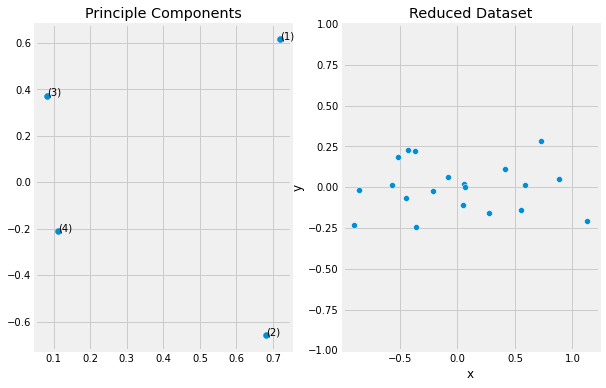

In [28]:
dataReduced = pd.DataFrame(data=dataReduced, columns=['x', 'y'])
F1, F2 = enumerate(pca.components_)
print(dataReduced.head())

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
i=1

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9,6))
ax1.scatter(F1[1], F2[1])   #I don't think this plot is meaningful, but leaving in place to discuss intepretation. 
ax1.set_title('Principle Components')
for xy in zip(F1[1], F2[1]):
    ax1.annotate('(%s)' % i, xy=xy, textcoords='data')
    i+=1
sns.scatterplot(x='x', y='y', data=dataReduced, ax=ax2)
ax2.set_title('Reduced Dataset')
ax2.set_ylim([-1,1])

plt.show()



***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.

#5 D) The reduced dataset suggest a somewhat linear relationship in the first 2 principle components. This could inform the number of clusters that would be optimal for a supervised learning algorithm. Using the 2 principle components could also accerelate the training of a supervised learning algorithm. 